In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sps
np.random.seed(12345678)

## Функции для распределения Пуассона

In [2]:
def PoissonDistribution(mu, x):
    '''
    This fuction returns an array of Poisson destribution in the points of "x" array.
    mu - is a paramter > 0
    x - array of real numbers (optional: np.array(..., dtype=float32))
    '''

    X = np.zeros_like(x)
    for i in range(X.shape[0]):
        X[i] = (mu**x[i])/np.math.factorial(int(x[i]))*np.exp(-mu)
    return X

def random_poisson(mu, size=1):
    '''
    This fuction generates an array of random points which are distributed as Poisson.
    mu - is a parameter of shape.
    '''
    poisson_array = np.zeros(size, dtype='int8')
    for k in range(size):
        a = np.exp(-mu)
        b = 1
        i = 0
        u = np.random.uniform(0. , 1.)
        b = b*u
        while b>=a:
            u = np.random.uniform(0., 1.)
            b = b*u
            i+=1
        poisson_array[k] = i
        
    return poisson_array

def transform_discrete_data(num_arr):
    '''
    This fuction transforms the given array of Poisson points into to arrays X and Y. 
    X - is an array of the points on the x-axis.
    Y - is an array of a probability, that is connected to each point in X-array by an index.
    Return value: tuple of X&Y arrays.
    '''
    d = {}
    size = len(num_arr)
    for num in num_arr:
        if num not in d:
            d[num] = 0
        d[num] += 1
    for num, count in d.items():
        d[num] = count/size
    X = np.zeros(len(d), dtype='int8')
    Y = np.zeros(len(d), dtype='f8')
    j = 0
    for num, p in d.items():
        X[j] = num
        Y[j] = p
        j += 1
    return (X, Y)

def create_data(arrays):
    '''
    With this function you can make a DataFrame (by Pandas bib) from two arrays.
    Parametrs: 2 arrays --> 1st for indexes, 2nd for probability.
    Return value: pd.DataFrame
    '''
    return pd.DataFrame(pd.Series(arrays[1], index=arrays[0]), columns=['''p(x)''']).sort_index()

## Построим дискретные выборки для $$n \in \{5, 10, 100, 1000, 10^5\}$$ $$\lambda =2$$

In [3]:
poisson_data_5 = [random_poisson(2, 5) for i in range(0, 5)]
poisson_data_10 = [random_poisson(2, 10) for i in range(0, 5)]
poisson_data_100 = [random_poisson(2, 100) for i in range(0, 5)]
poisson_data_1000 = [random_poisson(2, 1000) for i in range(0, 5)]
poisson_data_100k = [random_poisson(2, 100000) for i in range(0, 5)]

In [4]:
print('For n = 5:\n')
for i in range(5):
    print('{', end='')
    for j in range(5):
        print(str(poisson_data_5[i][j])+',', end=' ')
    print('}')
print('\nFor n = 10:\n')
for i in range(5):
    print('{', end='')
    for j in range(10):
        print(str(poisson_data_10[i][j])+',', end=' ')
    print('}')

For n = 5:

{2, 1, 1, 3, 0, }
{2, 1, 2, 3, 7, }
{2, 3, 1, 2, 0, }
{0, 5, 3, 4, 3, }
{2, 0, 0, 3, 1, }

For n = 10:

{3, 2, 2, 2, 2, 1, 2, 3, 2, 3, }
{2, 2, 5, 4, 2, 2, 0, 2, 2, 3, }
{1, 1, 1, 4, 1, 2, 2, 2, 5, 1, }
{0, 2, 1, 3, 3, 1, 1, 4, 0, 0, }
{6, 0, 5, 2, 5, 1, 1, 1, 2, 2, }


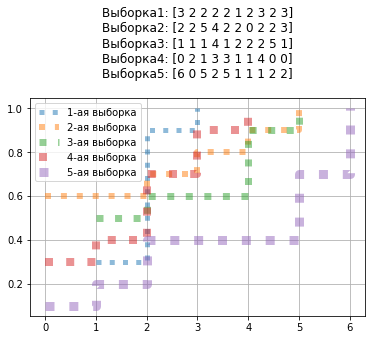

In [5]:
def emperical_poisson(poisson_array):
    x, y = transform_discrete_data(poisson_array)
    emp = y.copy()
    for i in range(len(y)):
        s = np.sum(y[0:i+1])
        emp[i] = s
    x.sort()
    return (x, emp)

title = ''

for i in range(5):
    title += 'Выборка{}: '.format(i+1)+np.array2string(poisson_data_10[i])+'\n'
    x, y = emperical_poisson(poisson_data_10[i])
    plt.step(x, y, where='post', label='{}-ая выборка'.format(i+1), alpha=0.5, ls=':', linewidth=i+5);


plt.title(title)
plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Poi_Emp_10.pdf', bbox_inches='tight')

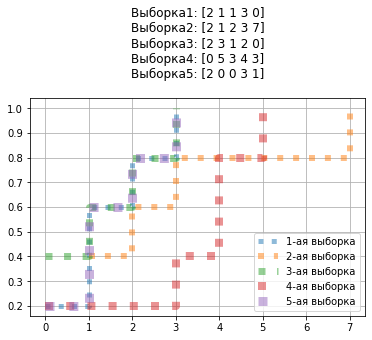

In [6]:
title = ''
for i in range(5):
    title += 'Выборка{}: '.format(i+1)+np.array2string(poisson_data_5[i])+'\n'
    x, y = emperical_poisson(poisson_data_5[i])
    plt.step(x, y, where='post', label='{}-ая выборка'.format(i+1),  alpha=0.5, ls=':', linewidth=i+5);

plt.title(title)
plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Poi_Emp_5.pdf', bbox_inches='tight')

In [9]:
def difference_emp_poisson(emp1, emp2):
    max_diff = 0
    k = np.max([np.max(emp1[0]), np.max(emp2[0])])
    a1 = np.zeros(k+1)
    a2 = np.zeros(k+1)
    for i in range(k+1):
        if i in emp1[0]:
            j = np.where(emp1[0]==i)[0][0]
            a1[i] = emp1[1][j]
        if i in emp2[0]:
            j = np.where(emp2[0]==i)[0][0]
            a2[i] = emp2[1][j]
    for i in range(k,-1,-1):
        if a1[i] in (0,1):
            a1[i] = 1
            continue
        if a1[i] not in (0,1):
            if a1[i-1]==0:
                a1[i-1]=a1[i]
    for i in range(k,-1,-1):
        if a2[i] in (0,1):
            a2[i] = 1
            continue
        if a2[i] not in (0,1):
            if a2[i-1]==0:
                a2[i-1]=a2[i]
    for i in range(k):
        if np.abs(a2[i]-a1[i])> max_diff:
            max_diff = np.abs(a2[i]-a1[i])
    return max_diff

## Построение вариационный ряда выборки

In [11]:
sort_poisson_data_5 = sorted(poisson_data_5[0])
sort_poisson_data_10 = sorted(poisson_data_10[0])
sort_poisson_data_100 = sorted(poisson_data_100[0])
sort_poisson_data_1000 = sorted(poisson_data_1000[0])
sort_poisson_data_100000 = sorted(poisson_data_100k[0])

In [12]:
print('Вариационный ряд для выборки {} --> {}'.format(poisson_data_5[0],sort_poisson_data_5))
print('Вариационный ряд для выборки {} --> {}'.format(poisson_data_10[0],sort_poisson_data_10))

Вариационный ряд для выборки [2 1 1 3 0] --> [0, 1, 1, 2, 3]
Вариационный ряд для выборки [3 2 2 2 2 1 2 3 2 3] --> [1, 2, 2, 2, 2, 2, 2, 3, 3, 3]


## Поиск квантилей для заданного уровня

In [13]:
def poisson_kvantil(emperical_func, level):
    if level<emperical_func[1][0]:
        return 0
    if level>=1:
        return emperical_func[0][-1]
    
    if level not in emperical_func[1]:
        for fr in emperical_func[1]:
            if level < fr:
                near_fr = np.where(emperical_func[1]==fr)[0][0]
                kvantil = emperical_func[0][near_fr]
                return kvantil
            
    if level in emperical_func[1]:
        near_fr = np.where(emperical_func[1]==level)
        kvantil = emperical_func[0][near_fr]+0.5
        return kvantil[0]

In [14]:
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_10[3],0.1,poisson_kvantil(emperical_poisson(poisson_data_10[3]), 0.1)))
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_10[3],0.5,poisson_kvantil(emperical_poisson(poisson_data_10[3]), 0.5)))
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_10[3],0.7,poisson_kvantil(emperical_poisson(poisson_data_10[3]), 0.7)))

Квантиль для выборки [0 2 1 3 3 1 1 4 0 0] уровня 0.1 == 0
Квантиль для выборки [0 2 1 3 3 1 1 4 0 0] уровня 0.5 == 2
Квантиль для выборки [0 2 1 3 3 1 1 4 0 0] уровня 0.7 == 2.5


In [15]:
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_5[3],0.1,poisson_kvantil(emperical_poisson(poisson_data_5[3]), 0.1)))
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_5[3],0.5,poisson_kvantil(emperical_poisson(poisson_data_5[3]), 0.5)))
print('Квантиль для выборки {} уровня {} == {}'.format(poisson_data_5[3],0.7,poisson_kvantil(emperical_poisson(poisson_data_5[3]), 0.7)))

Квантиль для выборки [0 5 3 4 3] уровня 0.1 == 0
Квантиль для выборки [0 5 3 4 3] уровня 0.5 == 4
Квантиль для выборки [0 5 3 4 3] уровня 0.7 == 4


## Полигон частот

In [16]:
def freq_polygon(poisson_array):
    d = {}
    for i in poisson_array:
        if i not in d:
            d[i] = 0
        d[i]+=1
    X = np.zeros(len(d))
    Y = np.zeros_like(X)
    i = 0
    l = len(poisson_array)
    for num, count in d.items():
        X[i] = num
        Y[i] = count/l
        i += 1
    return (X, Y)

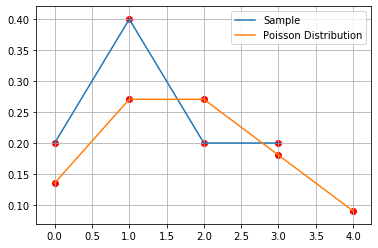

In [17]:
X, Y = freq_polygon(sort_poisson_data_5)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), label='Poisson Distribution');
plt.scatter(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');


plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_5.pdf', bbox_inches='tight')

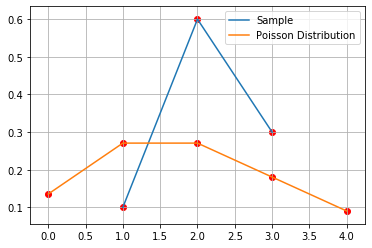

In [18]:
X, Y = freq_polygon(sort_poisson_data_10)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), label='Poisson Distribution');
plt.scatter(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');


plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_10.pdf', bbox_inches='tight')

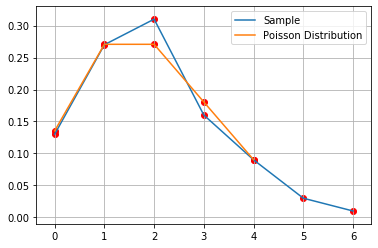

In [19]:
X, Y = freq_polygon(sort_poisson_data_100)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), label='Poisson Distribution');
plt.scatter(np.linspace(0,4,5), PoissonDistribution(2, np.linspace(0,4,5)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');


plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_100.pdf', bbox_inches='tight')

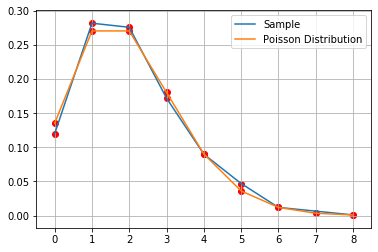

In [20]:
X, Y = freq_polygon(sort_poisson_data_1000)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,8,9), PoissonDistribution(2, np.linspace(0,8,9)), label='Poisson Distribution');
plt.scatter(np.linspace(0,8,9), PoissonDistribution(2, np.linspace(0,8,9)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');

plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_1000.pdf', bbox_inches='tight')

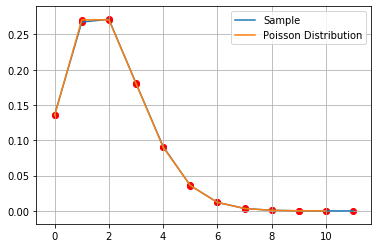

In [21]:
X, Y = freq_polygon(sort_poisson_data_100000)
plt.plot(X, Y, label='Sample');
plt.plot(np.linspace(0,10,11), PoissonDistribution(2, np.linspace(0,10,11)), label='Poisson Distribution');
plt.scatter(np.linspace(0,10,11), PoissonDistribution(2, np.linspace(0,10,11)), color='r', marker='o');
plt.scatter(X, Y, marker='o', color='red');
plt.legend();
plt.grid();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Freq_Pol_100000.pdf', bbox_inches='tight')

## Функции для распределения Эрланга

In [22]:
def Erlang_density(m, theta, x):
    '''
    This function makes an array of Erlang probability in given points.
    m&theta - are parametrs of Erlang distribution.
    x - is an array of points on the x-axis.
    Return value: array of density of probability in each point.
    '''
    X = np.array([])
    for i in x:
        X = np.append(X, np.array( (theta**m)/(sps.gamma(m)) *(i**(m-1))*np.exp(-theta*i)))
    
    return X

def random_erlang(k, theta, size=1):
    '''
    This fuction genegates <size> points of Erlang distribution.
    k&theta - are parametrs of Erlang distribution.
    Return value: array with generated points.
    '''
    Erlang_Points = np.zeros(size)
    Exp_Points = np.zeros(k)
    for i in range(size):
        for j in range(k):
            eps = np.random.uniform()
            Exp_Points[j] = -1/theta*np.log(eps)
        S = np.sum(Exp_Points)
        Erlang_Points[i] = S
    Exp_Points = np.sort(Exp_Points)
    return Erlang_Points

def transform_cont_data(erlang_array, split_point):
    '''
    This function transforms DataFrame processing points of Erlang destibution. She splits break with \
    split_points for uniform areas and counts how many points come in each area.
    Erlang_array - is an array, that includes some points.
    Return value: pd.DataFrame
    '''
    max_el = int(np.max(erlang_array)+1)
    steps = np.array([(i,i+1) for i in np.arange(0, max_el, split_point)])
    size = erlang_array.shape[0]
    X = np.arange(1, max_el+1, split_point)
    Y = np.zeros_like(X, dtype='f8')
    j=0
    for i in steps:
        x1 = erlang_array[erlang_array<i[1]]
        x2 = erlang_array[erlang_array>i[0]]
        x = np.intersect1d(x1, x2, assume_unique=True)
        Y[j] = x.shape[0]/size
        j+=1
    return pd.DataFrame(pd.Series(Y, index=X), columns=['''p(x)'''])

## Построим дискретные выборки для $$n \in \{5, 10, 100, 1000, 10^5\}$$ $$k = 2, \lambda =0.2$$

In [23]:
erlang_data_5 = [random_erlang(2, 0.2, 5) for i in range(5)]
erlang_data_10 = [random_erlang(2, 0.2, 10) for i in range(5)]
erlang_data_100 = [random_erlang(2, 0.2, 100) for i in range(5)]
erlang_data_1000 = [random_erlang(2, 0.2, 1000) for i in range(5)]
erlang_data_100k = [random_erlang(2, 0.2, 100000) for i in range(5)]

In [24]:
for i in range(5):
    print('Выборка для n = 5 №', i+1)
    print(erlang_data_5[i])
for i in range(5):
    print('Выборка для n = 10 №', i+1)
    print(erlang_data_10[i])

Выборка для n = 5 № 1
[ 5.9421019  11.44807109  6.62365005  7.87489003  2.45635452]
Выборка для n = 5 № 2
[ 9.35857672  5.42593345  8.67454297  3.64078017 24.47460582]
Выборка для n = 5 № 3
[ 4.12149242 12.17921777  3.67277797  1.7653166   6.81647508]
Выборка для n = 5 № 4
[ 2.52991527 16.06215858  6.21802248  8.72406171  9.27994777]
Выборка для n = 5 № 5
[ 4.8104724   9.50252976 12.45959956  7.25475611 13.86167984]
Выборка для n = 10 № 1
[ 8.58130886  3.66423006  1.79164652  5.92767193 10.98494037  2.4547873
  5.53636014 13.02075358  3.04152411  2.25022964]
Выборка для n = 10 № 2
[13.39529209  9.25100583  8.94824368  5.86686769  5.41960454  9.3764363
 14.30238063 12.9525475   3.68176189 14.32369798]
Выборка для n = 10 № 3
[25.6171706  22.98615893 13.67142919  9.124725    3.01742124  8.67368736
  8.97666668  2.99145935 12.18910849 17.96123682]
Выборка для n = 10 № 4
[ 0.49653198  1.07810215 31.51431504  8.52108966 12.18721983 12.95475821
  7.63917776  7.61748163 17.51576305 11.06032654

## Построение выброчного ряда

In [25]:
sort_erlang_data_5 = np.array(sorted(erlang_data_5[0]))
sort_erlang_data_10 = np.array(sorted(erlang_data_10[0]))
sort_erlang_data_100 = np.array(sorted(erlang_data_100[0]))
sort_erlang_data_1000 = np.array(sorted(erlang_data_1000[0]))
sort_erlang_data_100k = np.array(sorted(erlang_data_100k[0]))

In [26]:
print('Вариационный ряд для выборки {} --> {}'.format(erlang_data_5[0],sort_erlang_data_5))
print('Вариационный ряд для выборки {} --> {}'.format(erlang_data_10[0],sort_erlang_data_10))

Вариационный ряд для выборки [ 5.9421019  11.44807109  6.62365005  7.87489003  2.45635452] --> [ 2.45635452  5.9421019   6.62365005  7.87489003 11.44807109]
Вариационный ряд для выборки [ 8.58130886  3.66423006  1.79164652  5.92767193 10.98494037  2.4547873
  5.53636014 13.02075358  3.04152411  2.25022964] --> [ 1.79164652  2.25022964  2.4547873   3.04152411  3.66423006  5.53636014
  5.92767193  8.58130886 10.98494037 13.02075358]


## Построение эмпирической функции

In [27]:
def emperical_erlang(erlang_array, split_point):
    sorted(erlang_array)
    max_el = int(np.max(erlang_array)+1)
    steps = np.array([(i,i+1) for i in np.arange(0, max_el+1, split_point)])
    X = np.zeros(len(steps))
    Y = np.zeros_like(X)
    size = erlang_array.shape[0]
    j=0
    for i in steps:
        x1 = erlang_array[erlang_array<i[1]]
        x2 = erlang_array[erlang_array>i[0]]
        x = np.intersect1d(x1, x2, assume_unique=True)
        if x.shape[0] != 0:
            X[j] = i[0]
            Y[j] = np.sum(Y[j-1])+x.shape[0]/size
        else:
            X[j] = i[0]
            Y[j] = Y[j-1]
        j+=1
    return (X, Y)

In [28]:
def difference_emp_erlang(emp1, emp2):
    max_diff = 0
    k = int(np.max([np.max(emp1[0]), np.max(emp2[0])]))
    a1 = emp1[1]
    a2 = emp2[1]
    if emp1[1].shape[0] != (k+1):
        a_h = np.zeros(k+1-emp1[1].shape[0])
        a1 = np.concatenate([emp1[1], a_h])
    if emp2[1].shape[0] != k+1:
        a_h = np.zeros(k+1-emp2[1].shape[0])
        a2 = np.concatenate([emp2[1], a_h])

    for i in range(k, -1, -1):
        if a1[i]==0:
            a1[i]=1
        if a1[i-1]!=0:
            break
    for i in range(k, -1, -1):
        if a2[i]==0:
            a2[i]=1
        if a2[i-1]!=0:
            break
    for i in range(k+1):
        if np.abs(a2[i]-a1[i])>max_diff:
            max_diff = np.abs(a2[i]-a1[i])
    return max_diff

In [63]:
file = open('EvalOfDiff.txt', 'w')
file.write('Poisson Distibution:'+'\n')
file.write('n=5 <--> n=5: '+str(difference_emp_poisson(emperical_poisson(poisson_data_5[0]), emperical_poisson(poisson_data_5[1])))+'\n')
file.write('n=5 <--> n=10: '+str(difference_emp_poisson(emperical_poisson(poisson_data_5[0]), emperical_poisson(poisson_data_10[1])))+'\n')
file.write('n=5 <--> n=100: '+str(difference_emp_poisson(emperical_poisson(poisson_data_5[0]), emperical_poisson(poisson_data_100[1])))+'\n')
file.write('n=5 <--> n=1000: '+str(difference_emp_poisson(emperical_poisson(poisson_data_5[0]), emperical_poisson(poisson_data_1000[1])))+'\n')
file.write('n=5 <--> n=100k: '+str(difference_emp_poisson(emperical_poisson(poisson_data_5[0]), emperical_poisson(poisson_data_100k[1])))+'\n')
file.write('Erlang Distribution:'+'\n')
file.write('n=5 <--> n=5: '+str(difference_emp_erlang(emperical_erlang(erlang_data_5[0], 1), emperical_erlang(erlang_data_5[1], 1)))+'\n')
file.write('n=5 <--> n=10: '+str(difference_emp_erlang(emperical_erlang(erlang_data_5[0], 1), emperical_erlang(erlang_data_10[1], 1)))+'\n')
file.write('n=5 <--> n=100: '+str(difference_emp_erlang(emperical_erlang(erlang_data_5[0], 1), emperical_erlang(erlang_data_100[1], 1)))+'\n')
file.write('n=5 <--> n=1000: '+str(difference_emp_erlang(emperical_erlang(erlang_data_5[0], 1), emperical_erlang(erlang_data_1000[1], 1)))+'\n')
file.write('n=5 <--> n=100k: '+str(difference_emp_erlang(emperical_erlang(erlang_data_5[0], 1), emperical_erlang(erlang_data_100k[1], 1)))+'\n')
file.write('\n')
file.write('Poisson Distibution:'+'\n')
file.write('n=10 <--> n=5: '+str(difference_emp_poisson(emperical_poisson(poisson_data_10[0]), emperical_poisson(poisson_data_5[1])))+'\n')
file.write('n=10 <--> n=10: '+str(difference_emp_poisson(emperical_poisson(poisson_data_10[0]), emperical_poisson(poisson_data_10[1])))+'\n')
file.write('n=10 <--> n=100: '+str(difference_emp_poisson(emperical_poisson(poisson_data_10[0]), emperical_poisson(poisson_data_100[1])))+'\n')
file.write('n=10 <--> n=1000: '+str(difference_emp_poisson(emperical_poisson(poisson_data_10[0]), emperical_poisson(poisson_data_1000[1])))+'\n')
file.write('n=10 <--> n=100k: '+str(difference_emp_poisson(emperical_poisson(poisson_data_10[0]), emperical_poisson(poisson_data_100k[1])))+'\n')
file.write('Erlang Distribution:'+'\n')
file.write('n=10 <--> n=5: '+str(difference_emp_erlang(emperical_erlang(erlang_data_10[0], 1), emperical_erlang(erlang_data_5[1], 1)))+'\n')
file.write('n=10 <--> n=10: '+str(difference_emp_erlang(emperical_erlang(erlang_data_10[0], 1), emperical_erlang(erlang_data_10[1], 1)))+'\n')
file.write('n=10 <--> n=100: '+str(difference_emp_erlang(emperical_erlang(erlang_data_10[0], 1), emperical_erlang(erlang_data_100[1], 1)))+'\n')
file.write('n=10 <--> n=1000: '+str(difference_emp_erlang(emperical_erlang(erlang_data_10[0], 1), emperical_erlang(erlang_data_1000[1], 1)))+'\n')
file.write('n=10 <--> n=100k: '+str(difference_emp_erlang(emperical_erlang(erlang_data_10[0], 1), emperical_erlang(erlang_data_100k[1], 1)))+'\n')
file.write('\n')
file.write('Poisson Distibution:'+'\n')
file.write('n=100 <--> n=5: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100[0]), emperical_poisson(poisson_data_5[1])))+'\n')
file.write('n=100 <--> n=10: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100[0]), emperical_poisson(poisson_data_10[1])))+'\n')
file.write('n=100 <--> n=100: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100[0]), emperical_poisson(poisson_data_100[1])))+'\n')
file.write('n=100 <--> n=1000: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100[0]), emperical_poisson(poisson_data_1000[1])))+'\n')
file.write('n=100 <--> n=100k: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100[0]), emperical_poisson(poisson_data_100k[1])))+'\n')
file.write('Erlang Distribution:'+'\n')
file.write('n=100 <--> n=5: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100[0], 1), emperical_erlang(erlang_data_5[1], 1)))+'\n')
file.write('n=100 <--> n=10: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100[0], 1), emperical_erlang(erlang_data_10[1], 1)))+'\n')
file.write('n=100 <--> n=100: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100[0], 1), emperical_erlang(erlang_data_100[1], 1)))+'\n')
file.write('n=100 <--> n=1000: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100[0], 1), emperical_erlang(erlang_data_1000[1], 1)))+'\n')
file.write('n=100 <--> n=100k: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100[0], 1), emperical_erlang(erlang_data_100k[1], 1)))+'\n')
file.write('\n')
file.write('Poisson Distibution:'+'\n')
file.write('n=1000 <--> n=5: '+str(difference_emp_poisson(emperical_poisson(poisson_data_1000[0]), emperical_poisson(poisson_data_5[1])))+'\n')
file.write('n=1000 <--> n=10: '+str(difference_emp_poisson(emperical_poisson(poisson_data_1000[0]), emperical_poisson(poisson_data_10[1])))+'\n')
file.write('n=1000 <--> n=100: '+str(difference_emp_poisson(emperical_poisson(poisson_data_1000[0]), emperical_poisson(poisson_data_100[1])))+'\n')
file.write('n=1000 <--> n=1000: '+str(difference_emp_poisson(emperical_poisson(poisson_data_1000[0]), emperical_poisson(poisson_data_1000[1])))+'\n')
file.write('n=1000 <--> n=100k: '+str(difference_emp_poisson(emperical_poisson(poisson_data_1000[0]), emperical_poisson(poisson_data_100k[1])))+'\n')
file.write('Erlang Distribution:'+'\n')
file.write('n=1000 <--> n=5: '+str(difference_emp_erlang(emperical_erlang(erlang_data_1000[0], 1), emperical_erlang(erlang_data_5[1], 1)))+'\n')
file.write('n=1000 <--> n=10: '+str(difference_emp_erlang(emperical_erlang(erlang_data_1000[0], 1), emperical_erlang(erlang_data_10[1], 1)))+'\n')
file.write('n=1000 <--> n=100: '+str(difference_emp_erlang(emperical_erlang(erlang_data_1000[0], 1), emperical_erlang(erlang_data_100[1], 1)))+'\n')
file.write('n=1000 <--> n=1000: '+str(difference_emp_erlang(emperical_erlang(erlang_data_1000[0], 1), emperical_erlang(erlang_data_1000[1], 1)))+'\n')
file.write('n=1000 <--> n=100k: '+str(difference_emp_erlang(emperical_erlang(erlang_data_1000[0], 1), emperical_erlang(erlang_data_100k[1], 1)))+'\n')
file.write('\n')
file.write('Poisson Distibution:'+'\n')
file.write('n=100k <--> n=5: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100k[0]), emperical_poisson(poisson_data_5[1])))+'\n')
file.write('n=100k <--> n=10: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100k[0]), emperical_poisson(poisson_data_10[1])))+'\n')
file.write('n=100k <--> n=100: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100k[0]), emperical_poisson(poisson_data_100[1])))+'\n')
file.write('n=100k <--> n=1000: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100k[0]), emperical_poisson(poisson_data_1000[1])))+'\n')
file.write('n=100k <--> n=100k: '+str(difference_emp_poisson(emperical_poisson(poisson_data_100k[0]), emperical_poisson(poisson_data_100k[1])))+'\n')
file.write('Erlang Distribution:'+'\n')
file.write('n=100k <--> n=5: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100k[0], 1), emperical_erlang(erlang_data_5[1], 1)))+'\n')
file.write('n=100k <--> n=10: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100k[0], 1), emperical_erlang(erlang_data_10[1], 1)))+'\n')
file.write('n=100k <--> n=100: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100k[0], 1), emperical_erlang(erlang_data_100[1], 1)))+'\n')
file.write('n=100k <--> n=1000: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100k[0], 1), emperical_erlang(erlang_data_1000[1], 1)))+'\n')
file.write('n=100k <--> n=100k: '+str(difference_emp_erlang(emperical_erlang(erlang_data_100k[0], 1), emperical_erlang(erlang_data_100k[1], 1)))+'\n')
file.close()

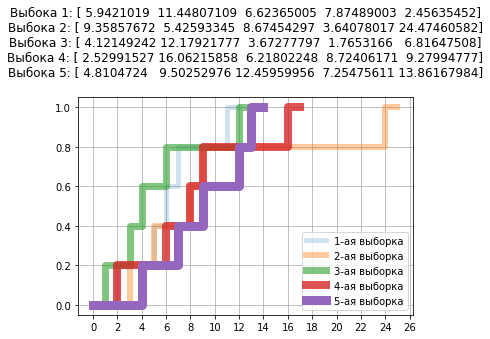

In [35]:
title = ''
for i in range(5):
    title += 'Выбока {}: '.format(i+1)+np.array2string(erlang_data_5[i])+'\n'
    x, y = emperical_erlang(erlang_data_5[i], 1)
    plt.step(x, y, where='post',  alpha=(i+1)/5, ls='-', linewidth=i+5, label='{}-ая выборка'.format(i+1));
plt.grid();
mx = 0
for i in range(5):
    m = np.max(erlang_data_5[i])
    if m>mx:
        mx = m
mx = int(mx+1)
if mx%2==1:
    mx+=1
    
plt.title(title)
plt.xticks(np.linspace(0,mx, int(mx/2)+1))
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Emp_Erlang_5.pdf', bbox_inches='tight')

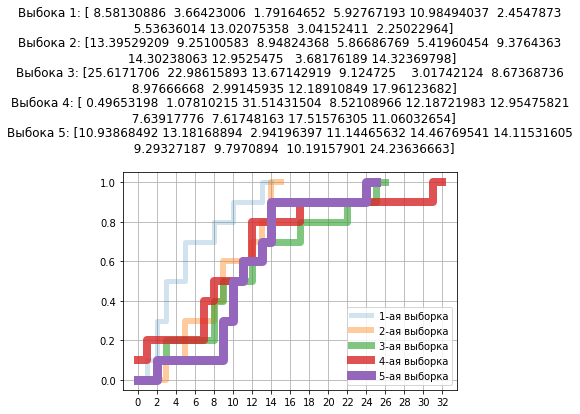

In [36]:
title = ''
for i in range(5):
    title += 'Выбока {}: '.format(i+1)+np.array2string(erlang_data_10[i])+'\n'
    x, y = emperical_erlang(erlang_data_10[i], 1)
    plt.step(x, y, where='post',  alpha=(i+1)/5, ls='-', linewidth=i+5, label='{}-ая выборка'.format(i+1));
plt.grid();
mx = 0
for i in range(5):
    m = np.max(erlang_data_10[i])
    if m>mx:
        mx = m
mx = int(mx+1)
if mx%2==1:
    mx+=1
    
plt.title(title)
plt.xticks(np.linspace(0,mx, int(mx/2)+1))
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Emp_Erlang_10.pdf', bbox_inches='tight')

## Квантили

In [37]:
def erlang_kvantil(emperical_func, level):
    if level<emperical_func[1][0]:
        return 0
    if level>=1:
        return emperical_func[0][-1]

    first_kvan = np.where(emperical_func[1]<=level+0.01)
    last_kvan = np.where(emperical_func[1]>(level-0.01))
    kvan_inds = np.intersect1d(first_kvan, last_kvan)
    if kvan_inds.shape[0] ==0:
        for fr in emperical_func[1]:
            if level < fr:
                near_fr = np.where(emperical_func[1]==fr)[0][0]
                kvantil = emperical_func[0][near_fr]

                return kvantil
    first_kvan = kvan_inds[0]
    last_kvan = kvan_inds[-1]

    kvantil = (emperical_func[0][first_kvan]+emperical_func[0][last_kvan])/2

    return kvantil

In [38]:
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_5[3], 0.1, erlang_kvantil(emperical_erlang(erlang_data_5[1],1), 0.1)))
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_5[3], 0.5, erlang_kvantil(emperical_erlang(erlang_data_5[1],1), 0.5)))
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_5[3], 0.7, erlang_kvantil(emperical_erlang(erlang_data_5[1],1), 0.7)))

Квантиль для выборки [ 2.52991527 16.06215858  6.21802248  8.72406171  9.27994777] уровня 0.1 = 3.0
Квантиль для выборки [ 2.52991527 16.06215858  6.21802248  8.72406171  9.27994777] уровня 0.5 = 8.0
Квантиль для выборки [ 2.52991527 16.06215858  6.21802248  8.72406171  9.27994777] уровня 0.7 = 9.0


In [39]:
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_10[4], 0.1, erlang_kvantil(emperical_erlang(erlang_data_10[4],1), 0.1)))
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_10[4], 0.5, erlang_kvantil(emperical_erlang(erlang_data_10[4],1), 0.5)))
print('Квантиль для выборки {} уровня {} = {}'.format(erlang_data_10[4], 0.7, erlang_kvantil(emperical_erlang(erlang_data_10[4],1), 0.7)))

Квантиль для выборки [10.93868492 13.18168894  2.94196397 11.14465632 14.46769541 14.11531605
  9.29327187  9.7970894  10.19157901 24.23636663] уровня 0.1 = 5.0
Квантиль для выборки [10.93868492 13.18168894  2.94196397 11.14465632 14.46769541 14.11531605
  9.29327187  9.7970894  10.19157901 24.23636663] уровня 0.5 = 10.0
Квантиль для выборки [10.93868492 13.18168894  2.94196397 11.14465632 14.46769541 14.11531605
  9.29327187  9.7970894  10.19157901 24.23636663] уровня 0.7 = 13.0


## Гистограмма частот

In [40]:
def hist_freq(erlang_array, split_point):
    max_el = int(np.max(erlang_array)+1)
    steps = np.array([(i,i+1) for i in np.arange(0, max_el, split_point)])
    X = np.arange(1, max_el+1, split_point)
    Y = np.zeros_like(X)
    size = erlang_array.shape[0]
    j=0
    for i in steps:
        x1 = erlang_array[erlang_array<i[1]]
        x2 = erlang_array[erlang_array>i[0]]
        x = np.intersect1d(x1, x2, assume_unique=True)
        Y[j] = x.shape[0]/size
        j+=1
    return (X, Y)

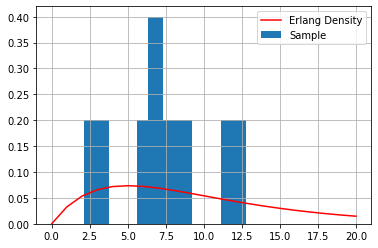

In [41]:
X, Y = hist_freq(sort_erlang_data_5, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 20, 21)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_5.pdf', bbox_inches='tight')

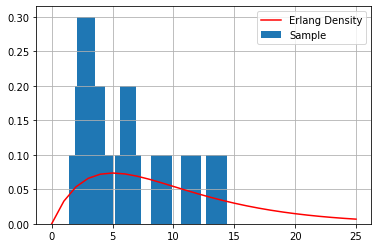

In [42]:
X, Y = hist_freq(sort_erlang_data_10, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 25, 26)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_10.pdf', bbox_inches='tight')

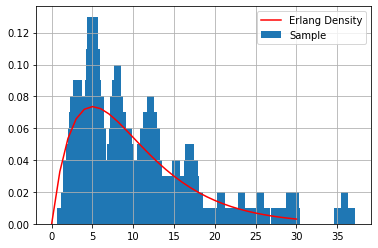

In [43]:
X, Y = hist_freq(sort_erlang_data_100, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 30, 31)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_100.pdf', bbox_inches='tight')

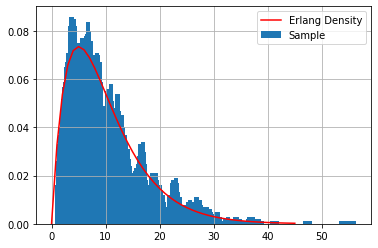

In [44]:
X, Y = hist_freq(sort_erlang_data_1000, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 45, 46)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_1000.pdf', bbox_inches='tight')

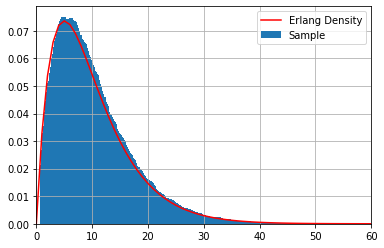

In [45]:
X, Y = hist_freq(sort_erlang_data_100k, 0.1)
plt.bar(X, Y, label='Sample');
x = np.linspace(0, 60, 61)
plt.plot(x, Erlang_density(2,0.2,x), label='Erlang Density', color='red');
plt.grid();
plt.xlim(0,60);
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ2/Images/Hist_Erlang_100k.pdf', bbox_inches='tight')